<a href="https://colab.research.google.com/github/zy-shih/titanic-analysis/blob/main/%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC(2)reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


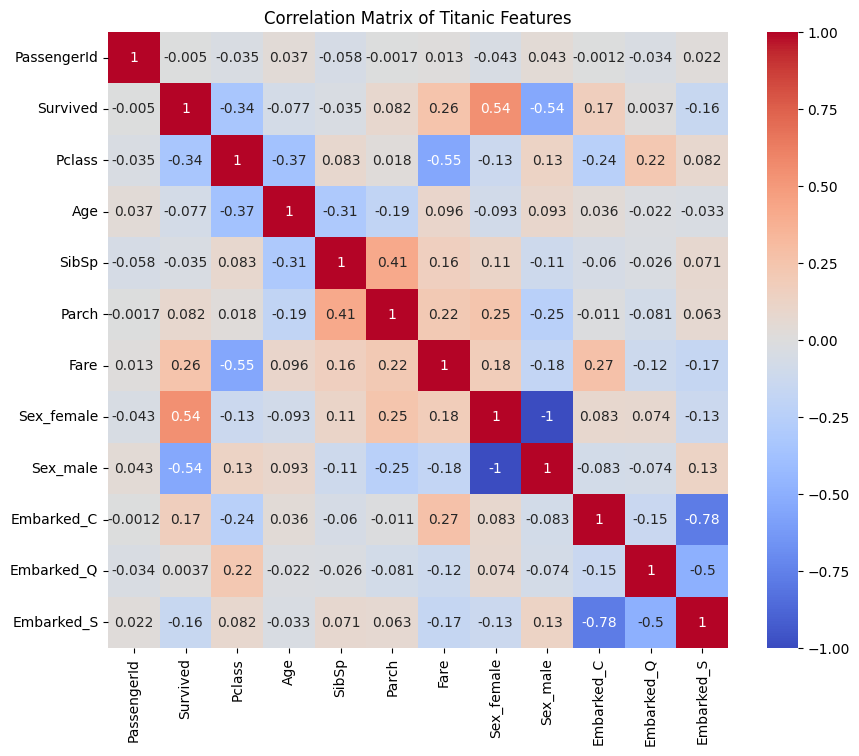

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 複製 Titanic 數據集
df_titanic = titanic.copy()
# 刪除數據集中的缺失值
df_titanic.dropna()
# 刪除 'Name', 'Ticket', 'Cabin' 列
df_titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
# 將 'Sex' 和 'Embarked' 列轉換為虛擬變量（one-hot encoding）
#df_titanic_ana = pd.get_dummies(df_titanic, columns=['Sex', 'Embarked'])


#計算相關係數矩陣
corr_matrix = df_titanic_ana.corr()

#使用熱力圖視覺化相關係數矩陣
plt.figure(figsize = (10 , 8))# 設置圖形大小
#繪製熱力圖，annot=True 表示顯示每個方格的數值，cmap='coolwarm' 設置顏色
sns.heatmap(corr_matrix , annot = True , cmap = 'coolwarm')
plt.title('Correlation Matrix of Titanic Features')# 設置圖表標題
plt.show()

相關係數的範圍在 -1 到 1 之間，越接近 1 表示正相關，越接近 -1 表示負相關，接近 0 則表示沒有線性相關性。

*   負相關:一個上升另一個就下降
*   正相關:一個上升另一個也上升


# **進一步觀察各屬性與生存之關係**


In [16]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , fill= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

## **劃出數值型欄位之分布圖**

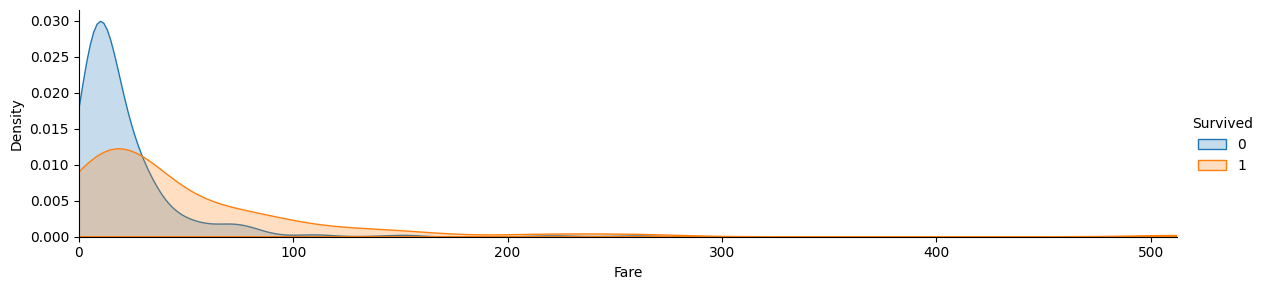

In [17]:
plot_distribution( df_titanic_ana , var = 'Fare' , target = 'Survived' )
plt.show()

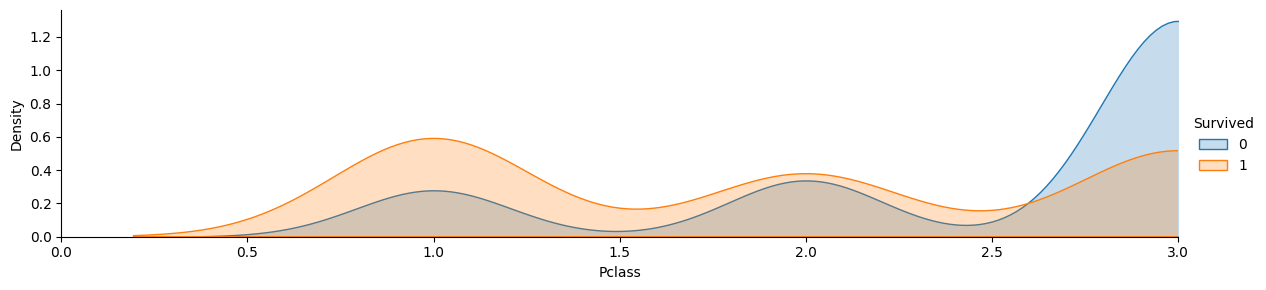

In [18]:
plot_distribution( df_titanic_ana , var = 'Pclass' , target = 'Survived' )
plt.show()

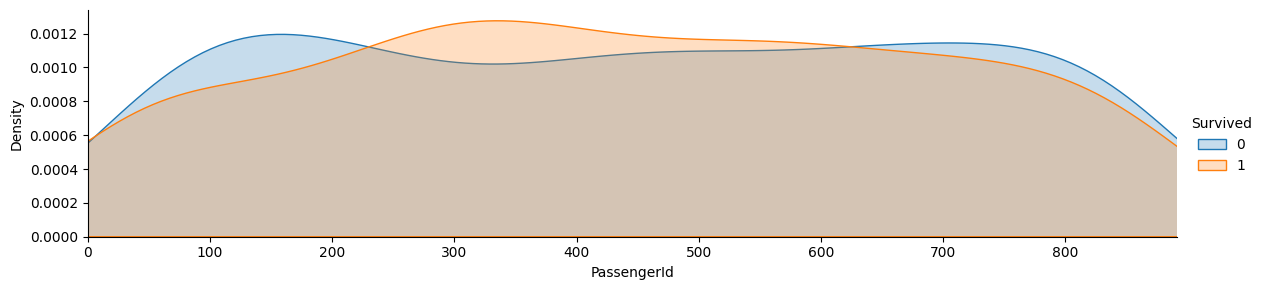

In [19]:
plot_distribution( df_titanic_ana , var = 'PassengerId' , target = 'Survived' )
plt.show()

## **類別型欄位 使用長條圖來觀察**

In [20]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

In [30]:
print(df_titanic_ana.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


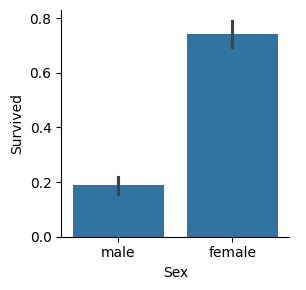

In [33]:
#先建立一個新的 Sex 欄位。這個欄位的值可以基於 Sex_female 和 Sex_male 的值來決定 (由於先前將sex拆解)
df_titanic_ana['Sex'] = df_titanic_ana.apply(lambda row: 'female' if row['Sex_female'] == 1 else 'male', axis=1)

plot_categories( df_titanic_ana , cat = 'Sex' , target = 'Survived' )
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


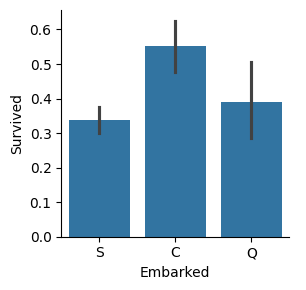

In [36]:
# 建立新的 'Embarked' 欄位
def get_embarked(row):
    if row['Embarked_C'] == 1:
        return 'C'
    elif row['Embarked_Q'] == 1:
        return 'Q'
    elif row['Embarked_S'] == 1:
        return 'S'


df_titanic_ana['Embarked'] = df_titanic_ana.apply(get_embarked, axis=1)

plot_categories( df_titanic_ana , cat = 'Embarked' , target = 'Survived' )
plt.show()